Here is one example of number detection in images. 
our project is similer with this one. there are few thing to change
1. the example is 3D array since there is only grey color from 0 to 255. however, RGB images is 5D array (x, y, R, G, B)
2. need to check how to load the data in to x_train, y_train, x_test, y_test. x meaning the input images, y meaning the category. 
3. you could find the video of below code at this [link](https://www.bilibili.com/video/av83140710/), from 85:35 to 94:21

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Preprocess the Data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


8


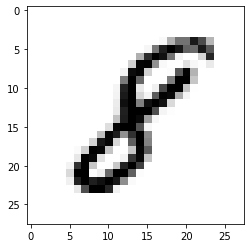

In [7]:
image_index = 7777

print(y_train[image_index])
plt.imshow(x_train[image_index], cmap = 'Greys')

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# Reshaping the array to 4-dims so that it can work with the keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print("x_train shape:", x_train.shape)
print("Number of images in x_train", x_train.shape[0])
print("Number of images in x_test", x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Build and Train Model

In [11]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #Falttening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(x=x_train, y = y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2104 - accuracy: 0.9368
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0820 - accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0575 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0347 - accuracy: 0.9891


In [14]:
model.fit(x=x_train, y = y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0286 - accuracy: 0.9902
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0232 - accuracy: 0.9919
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0235 - accuracy: 0.9922
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0178 - accuracy: 0.9935


## Test and Predict

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.9849


[0.06252443045377731, 0.9848999977111816]

1


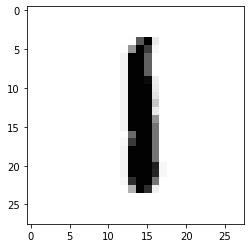

In [18]:
image_index = 5550
plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())